# EDA

In [1]:
#Sezione in cui vengono effettuati gli import necessari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Utils

In [3]:
# Caricamento dei dataset

file_path_train = 'KDDTrain+.txt'
file_path_test = 'KDDTest+.txtt'

datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "level"]

df_train = pd.read_table(file_path_train, sep=",", names=datacols)
df_test = pd.read_table(file_path_test, sep=",", names=datacols)

In [4]:
#mappiamo le diverse tipologie di attacchi nelle 4 classi generali: dos, probe, R2L, U2R e poi la classe Normal per la mancanza di attacco
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'}

# Aggiunge la colonna contenente la "classe di attacco"
df_train['attack_class'] = df_train['attack'].apply(lambda v: mapping[v])
df_test['attack_class'] = df_test['attack'].apply(lambda v: mapping[v])

## Visualizzazione delle tabelle

In [5]:
# Visualizziamo i primi 5 esempi del TRAINING SET
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


In [6]:
# Visualizziamo gli ultimi 5 esempi del TRAINING SET
df_train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_class
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,DoS
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21,Normal


In [7]:
# Visualizziamo i primi 5 esempi del TEST SET
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,Probe


In [8]:
# Visualizziamo gli ultimi 5 esempi del TEST SET
df_test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_class
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,Normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,Normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15,DoS
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21,Normal
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14,Probe


In [9]:
# dimensione dei 2 dataframe
print(f'TRAIN SET: {df_train.shape}')
print(f'TEST SET: {df_test.shape}')

TRAIN SET: (125973, 44)
TEST SET: (22544, 44)


In [10]:
# Analisi delle informazioni di base
print('TRAIN SET:')
print(df_train.info())
print('\nTEST SET:')
print(df_test.info())

TRAIN SET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  i

## Classe Target (attack_class)

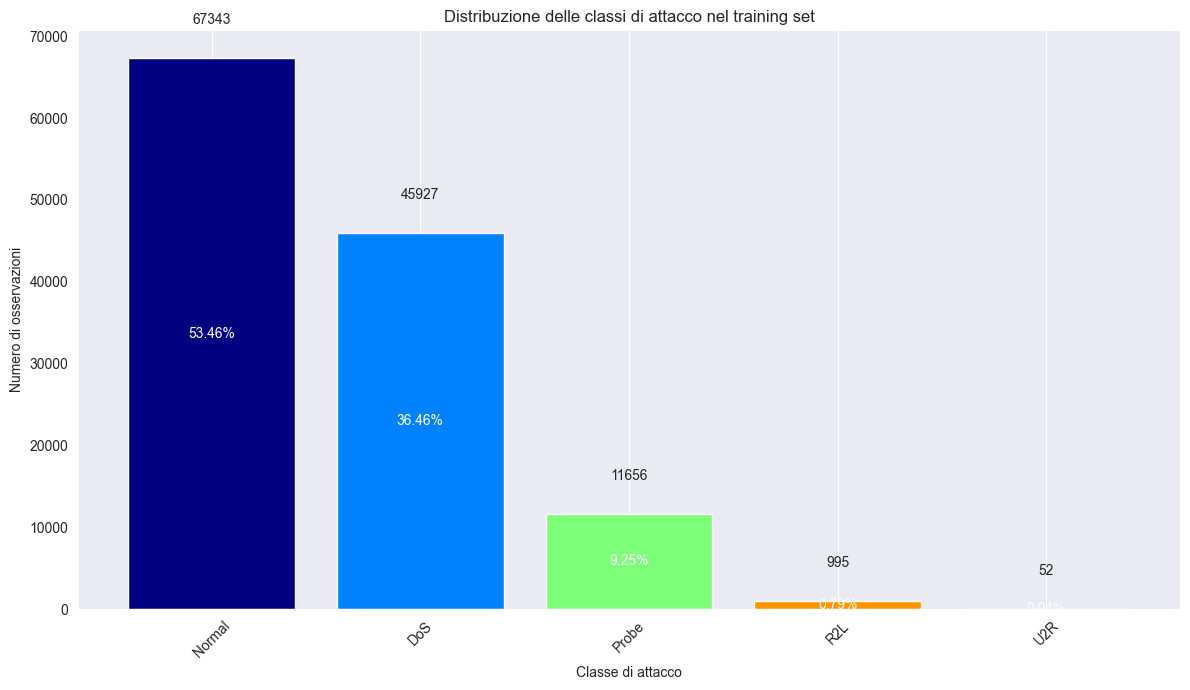

In [11]:
# Distribuzione delle classi di Attacco nel TRAINING SET
Utils.plot_class_distribution(
    df=df_train,
    column='attack_class',
    title='Distribuzione delle classi di attacco nel training set',
    xlabel='Classe di attacco',
    ylabel='Numero di osservazioni'
)

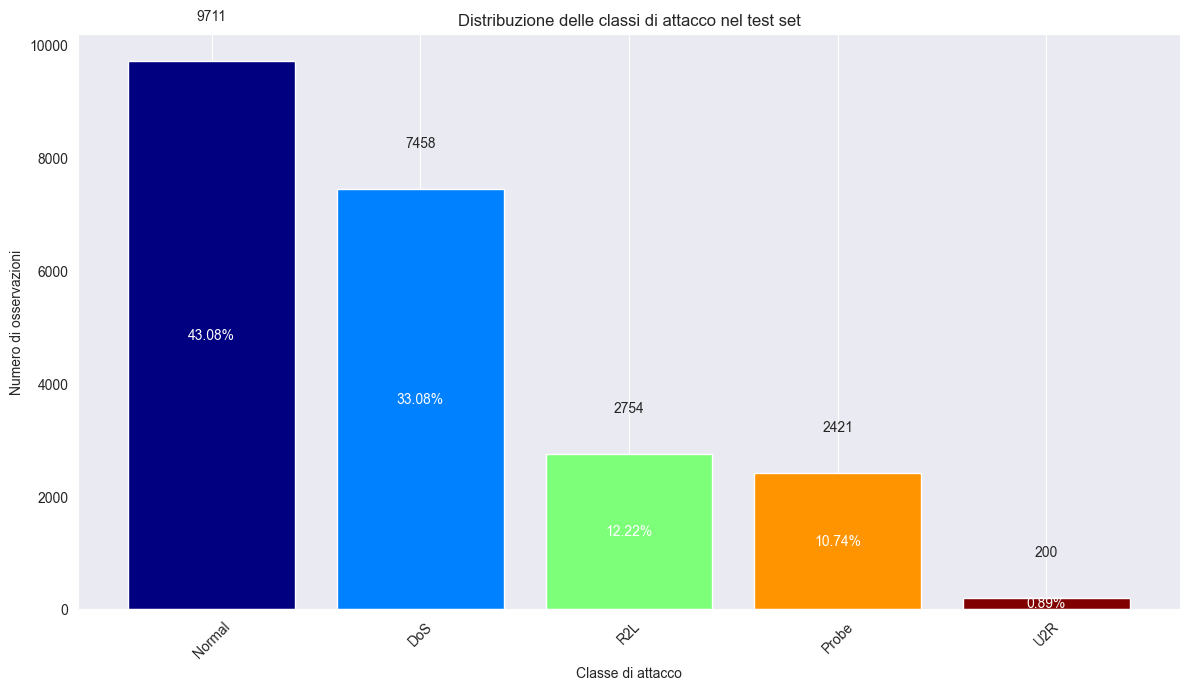

In [13]:
# Distribuzione delle classi di Attacco nel TEST SET
Utils.plot_class_distribution(
    df=df_test,
    column='attack_class',
    title='Distribuzione delle classi di attacco nel test set',
    xlabel='Classe di attacco',
    ylabel='Numero di osservazioni'
)

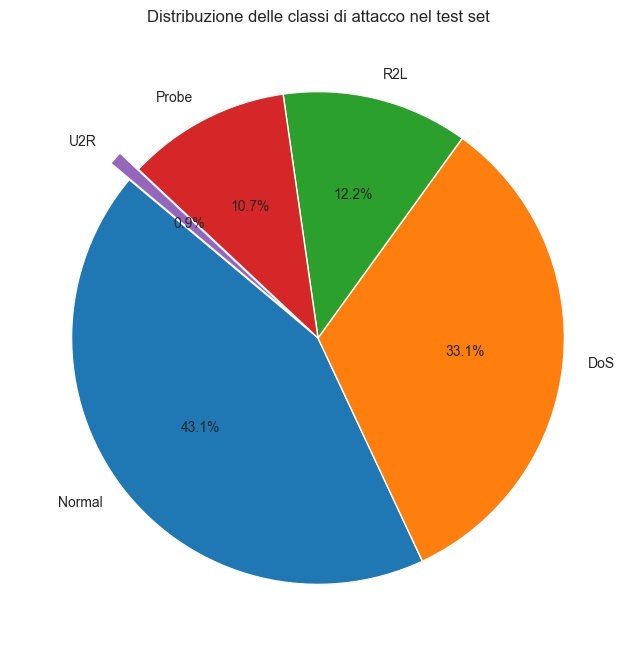

In [14]:
Utils.plot_pie_chart_distribution(
    df=df_test,
    column='attack_class',
    title='Distribuzione delle classi di attacco nel test set'
)

## FEATURE CATEGORICHE

### Tipo di Protocollo

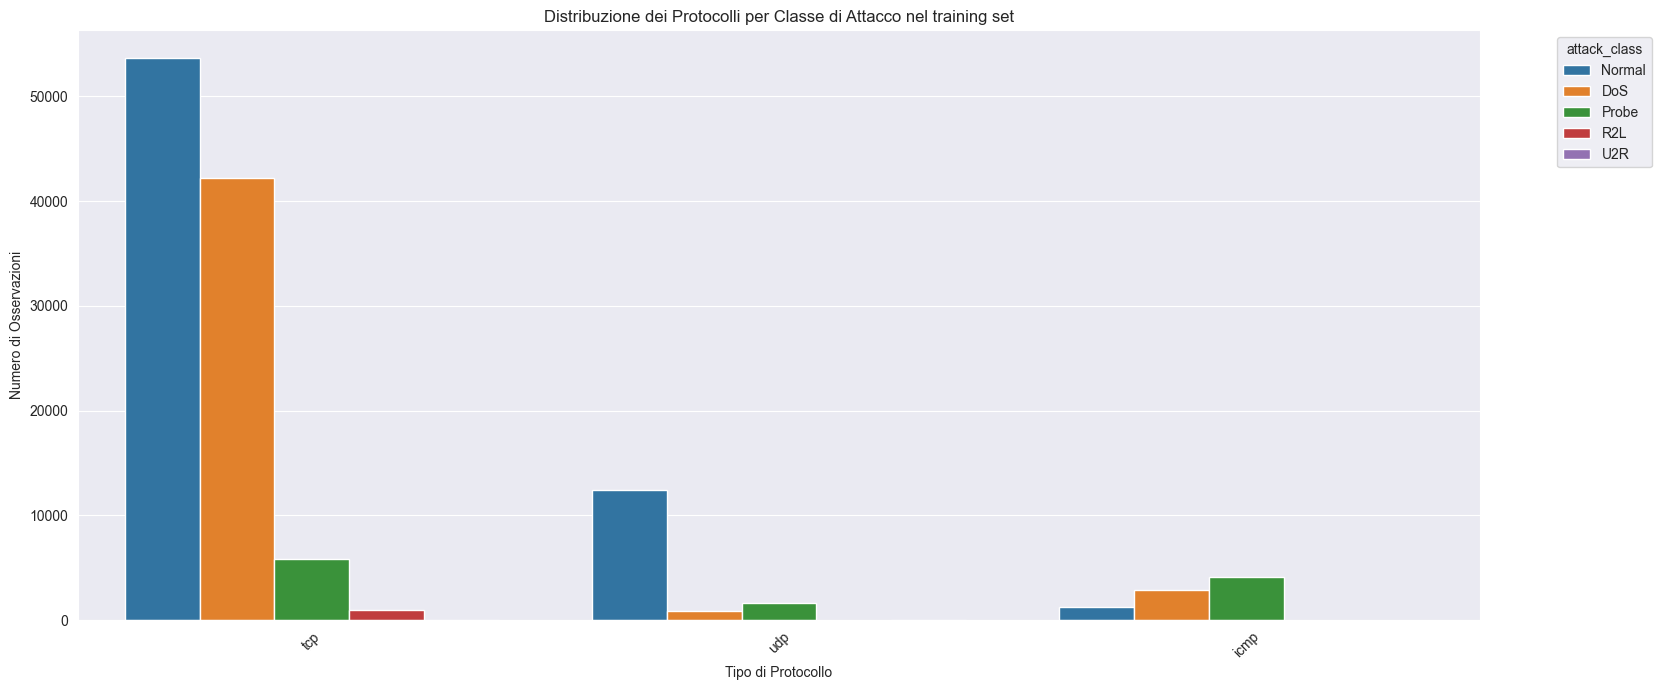

In [15]:
# distribuzione dei protocolli utilizzati dai diversi tipi di attacchi
Utils.plot_grouped_bar(
    df=df_train,
    category='protocol_type',
    sub_category='attack_class',
    count='Numero di Osservazioni',
    title='Distribuzione dei Protocolli per Classe di Attacco nel training set',
    xlabel='Tipo di Protocollo',
    ylabel='Numero di Osservazioni'
)

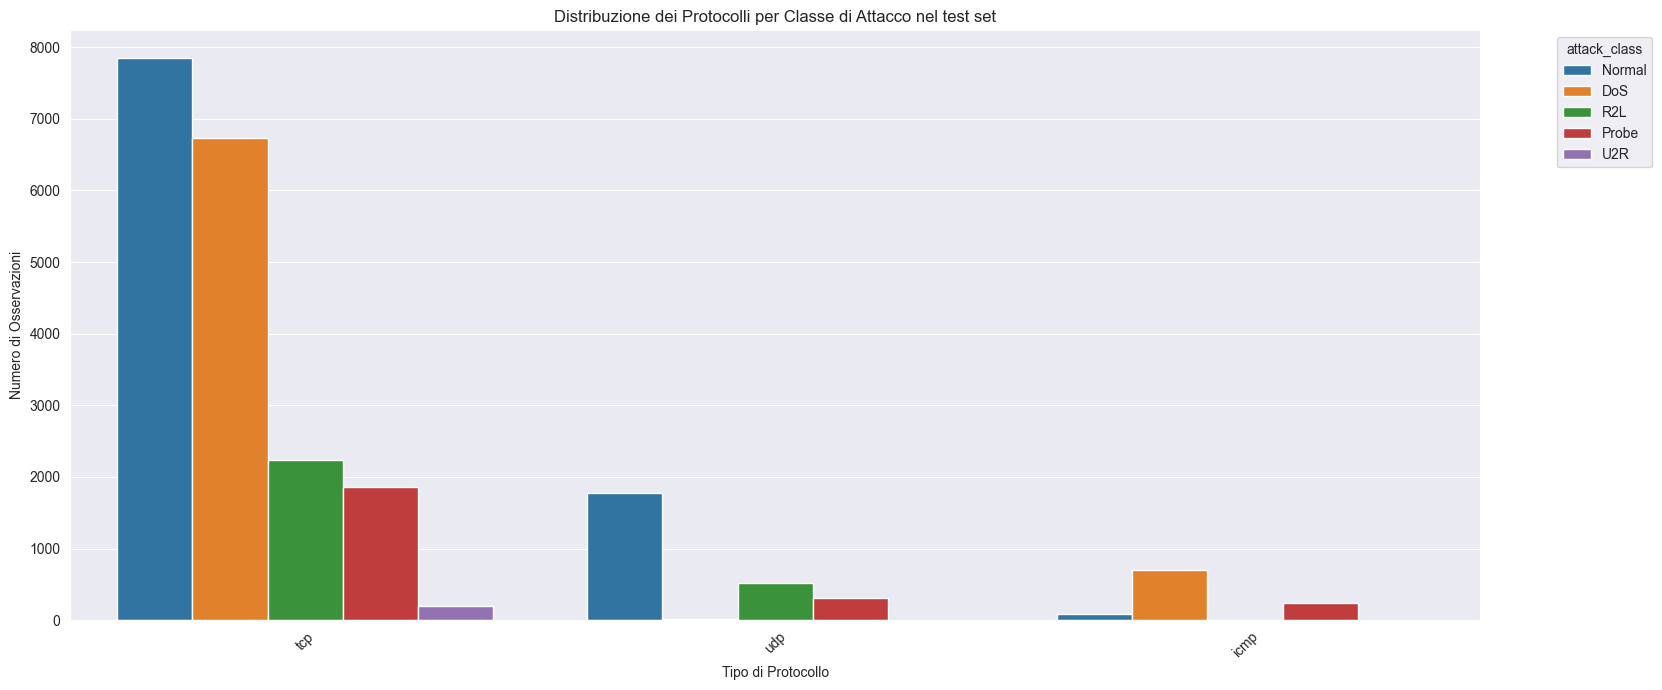

In [15]:
# distribuzione dei protocolli utilizzati dai diversi tipi di attacchi
Utils.plot_grouped_bar(
    df=df_test,
    category='protocol_type',
    sub_category='attack_class',
    count='Numero di Osservazioni',
    title='Distribuzione dei Protocolli per Classe di Attacco nel test set',
    xlabel='Tipo di Protocollo',
    ylabel='Numero di Osservazioni'
)

## TIPI DI ATTACCO

In [16]:
table = Utils.create_class_distribution_table(df_train, 'attack')
print(table.to_markdown())

|    | Attacco         |   Numero di Esempi |   Percentuale |
|---:|:----------------|-------------------:|--------------:|
|  1 | normal          |              67343 |        53.458 |
|  2 | neptune         |              41214 |        32.717 |
|  3 | satan           |               3633 |         2.884 |
|  4 | ipsweep         |               3599 |         2.857 |
|  5 | portsweep       |               2931 |         2.327 |
|  6 | smurf           |               2646 |         2.1   |
|  7 | nmap            |               1493 |         1.185 |
|  8 | back            |                956 |         0.759 |
|  9 | teardrop        |                892 |         0.708 |
| 10 | warezclient     |                890 |         0.707 |
| 11 | pod             |                201 |         0.16  |
| 12 | guess_passwd    |                 53 |         0.042 |
| 13 | buffer_overflow |                 30 |         0.024 |
| 14 | warezmaster     |                 20 |         0.016 |
| 15 | l

In [17]:
table = Utils.create_class_distribution_table(df_test, 'attack')
print(table.to_markdown())

|    | Attacco         |   Numero di Esempi |   Percentuale |
|---:|:----------------|-------------------:|--------------:|
|  1 | normal          |               9711 |        43.076 |
|  2 | neptune         |               4657 |        20.657 |
|  3 | guess_passwd    |               1231 |         5.46  |
|  4 | mscan           |                996 |         4.418 |
|  5 | warezmaster     |                944 |         4.187 |
|  6 | apache2         |                737 |         3.269 |
|  7 | satan           |                735 |         3.26  |
|  8 | processtable    |                685 |         3.039 |
|  9 | smurf           |                665 |         2.95  |
| 10 | back            |                359 |         1.592 |
| 11 | snmpguess       |                331 |         1.468 |
| 12 | saint           |                319 |         1.415 |
| 13 | mailbomb        |                293 |         1.3   |
| 14 | snmpgetattack   |                178 |         0.79  |
| 15 | p

In [18]:
unique_values_in_train, unique_values_in_test = Utils.find_unique_values(
    df1=df_train,
    df2=df_test,
    column_name='attack',
    df1_name='Training Set',
    df2_name='Test Set'
)

print("Valori unici nel Training Set:")
print(unique_values_in_train.to_markdown(index=False))
print("\nValori unici nel Test Set:")
print(unique_values_in_test.to_markdown(index=False))

Valori unici nel Training Set:
| Valori unici in Training Set   |
|:-------------------------------|
| spy                            |
| warezclient                    |

Valori unici nel Test Set:
| Valori unici in Test Set   |
|:---------------------------|
| snmpguess                  |
| xlock                      |
| apache2                    |
| xterm                      |
| worm                       |
| sqlattack                  |
| sendmail                   |
| saint                      |
| snmpgetattack              |
| mscan                      |
| mailbomb                   |
| httptunnel                 |
| named                      |
| processtable               |
| xsnoop                     |
| udpstorm                   |
| ps                         |


## SERVICE

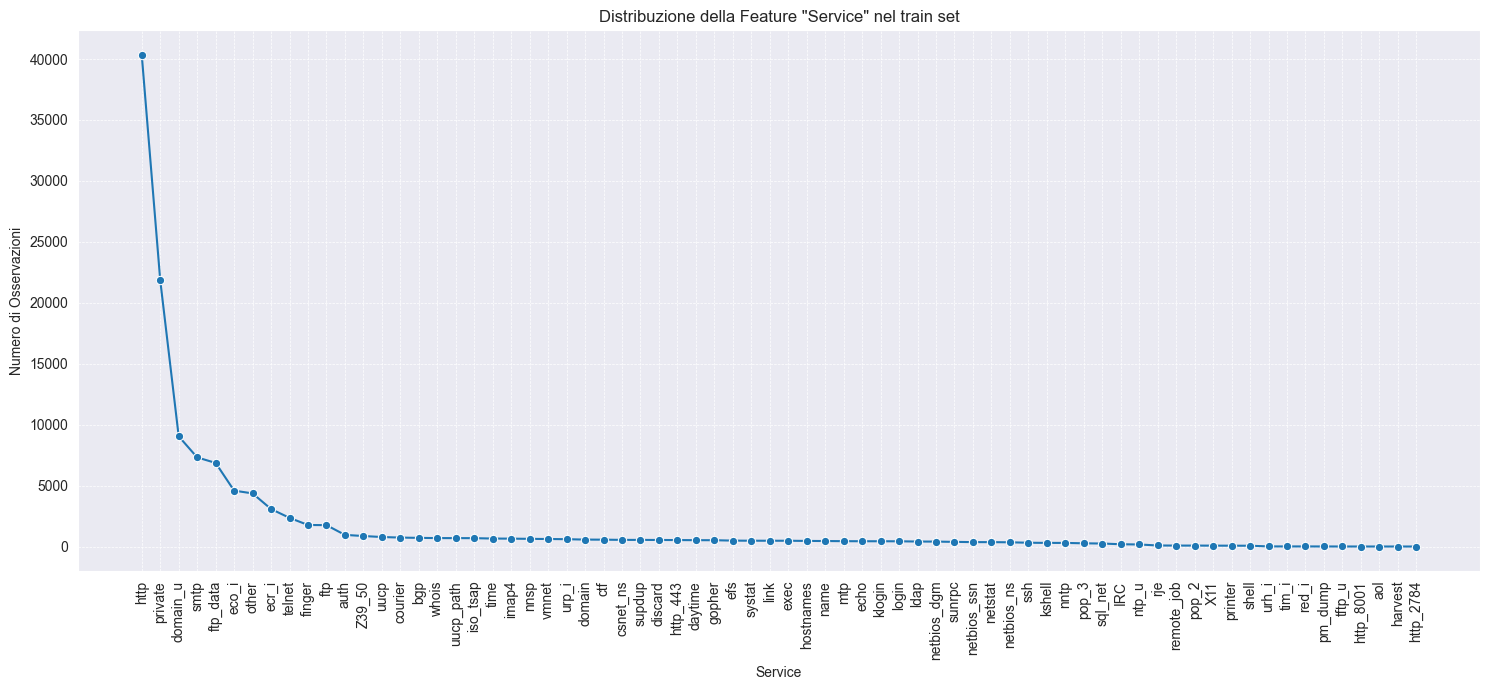

In [19]:
Utils.plot_line_distribution(
    df=df_train,
    column='service',
    title='Distribuzione della Feature "Service" nel train set',
    xlabel='Service'
)

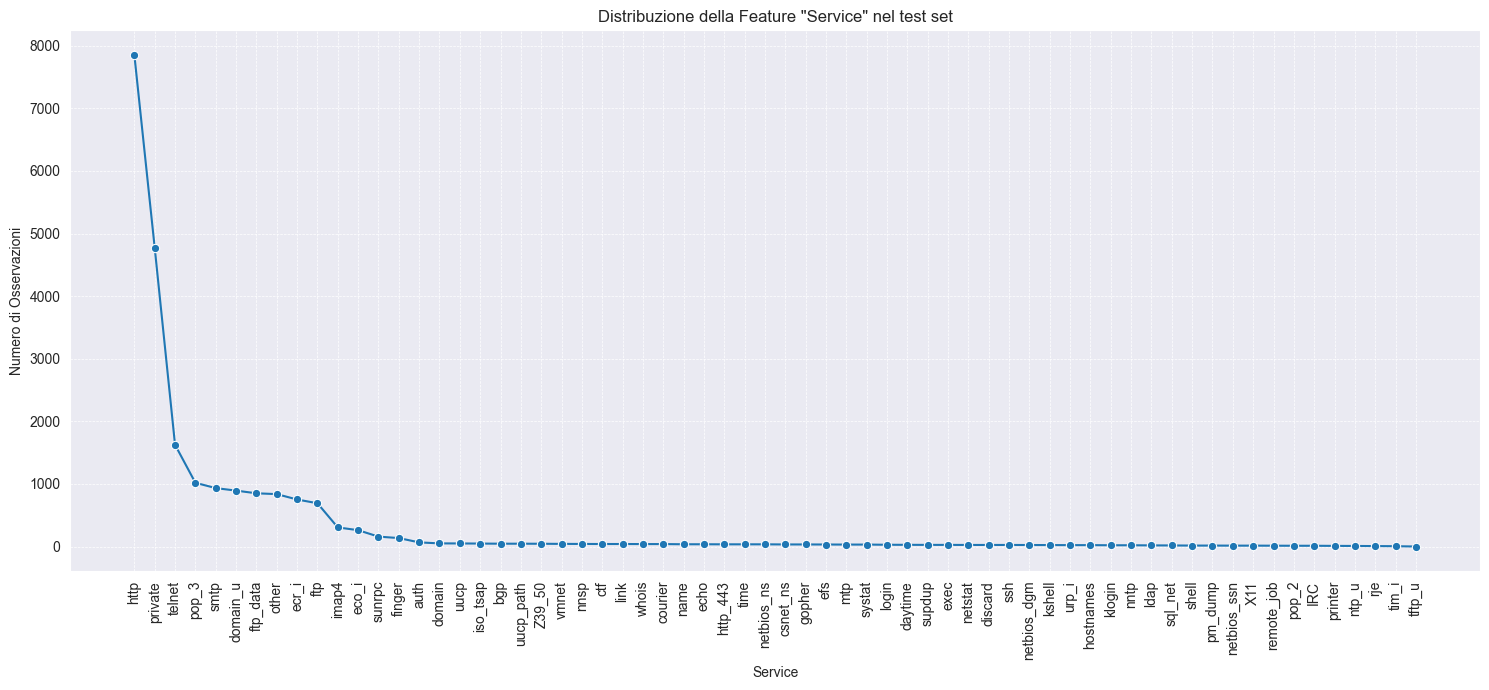

In [20]:
Utils.plot_line_distribution(
    df=df_test,
    column='service',
    title='Distribuzione della Feature "Service" nel test set',
    xlabel='Service'
)

In [21]:
# tabella di contingenza tra
table = pd.crosstab(df_train['service'], df_train['attack_class'])
# Ordina la tabella in base alla somma delle righe in ordine decrescente
table = table.reindex(table.sum(axis=1).sort_values(ascending=False).index)
print(table)


attack_class    DoS  Normal  Probe  R2L  U2R
service                                     
http           2255   38049     30    4    0
private       15971     982   4900    0    0
domain_u          0    9034      9    0    0
smtp            241    7029     43    0    0
ftp_data       1209    4984     51  604   12
...             ...     ...    ...  ...  ...
tftp_u            0       3      0    0    0
http_8001         0       0      2    0    0
harvest           0       0      2    0    0
aol               0       0      2    0    0
http_2784         0       0      1    0    0

[70 rows x 5 columns]


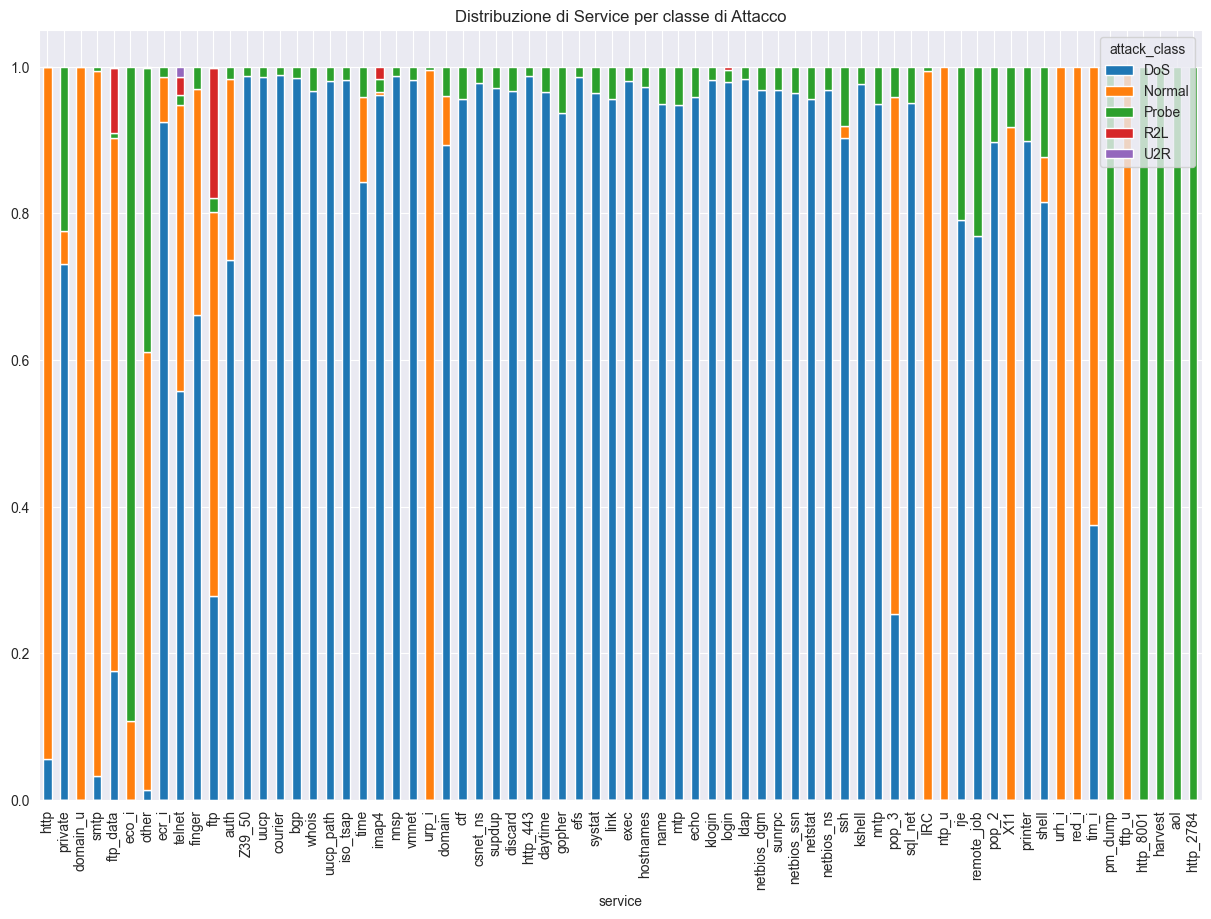

In [22]:
# grafico a barre impilate ditribuzione congiunta service attack_class
table_normalized = table.div(table.sum(1), axis=0)  # Normalizza per rendere le frequenze proporzionali
table_normalized.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Distribuzione di Service per classe di Attacco')
plt.show()

## FLAG

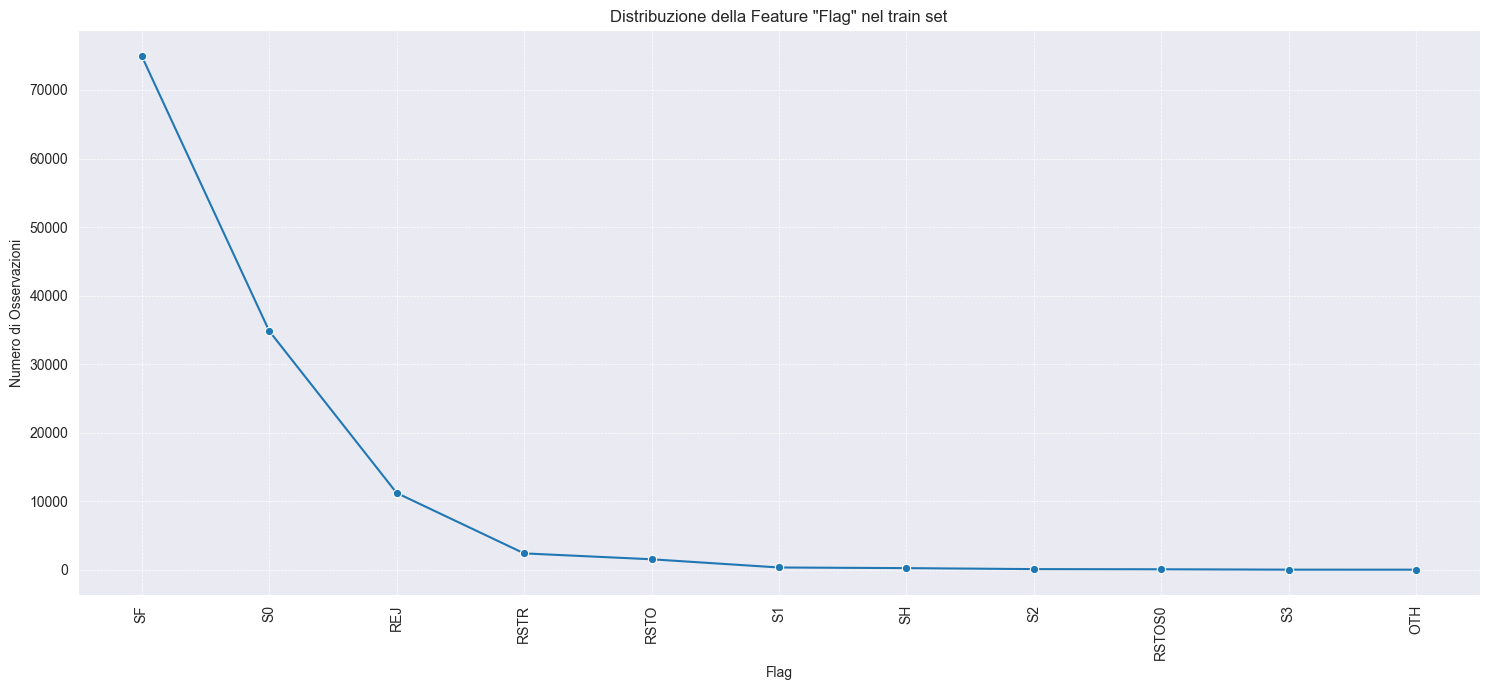

In [23]:
Utils.plot_line_distribution(
    df=df_train,
    column='flag',
    title='Distribuzione della Feature "Flag" nel train set',
    xlabel='Flag'
)

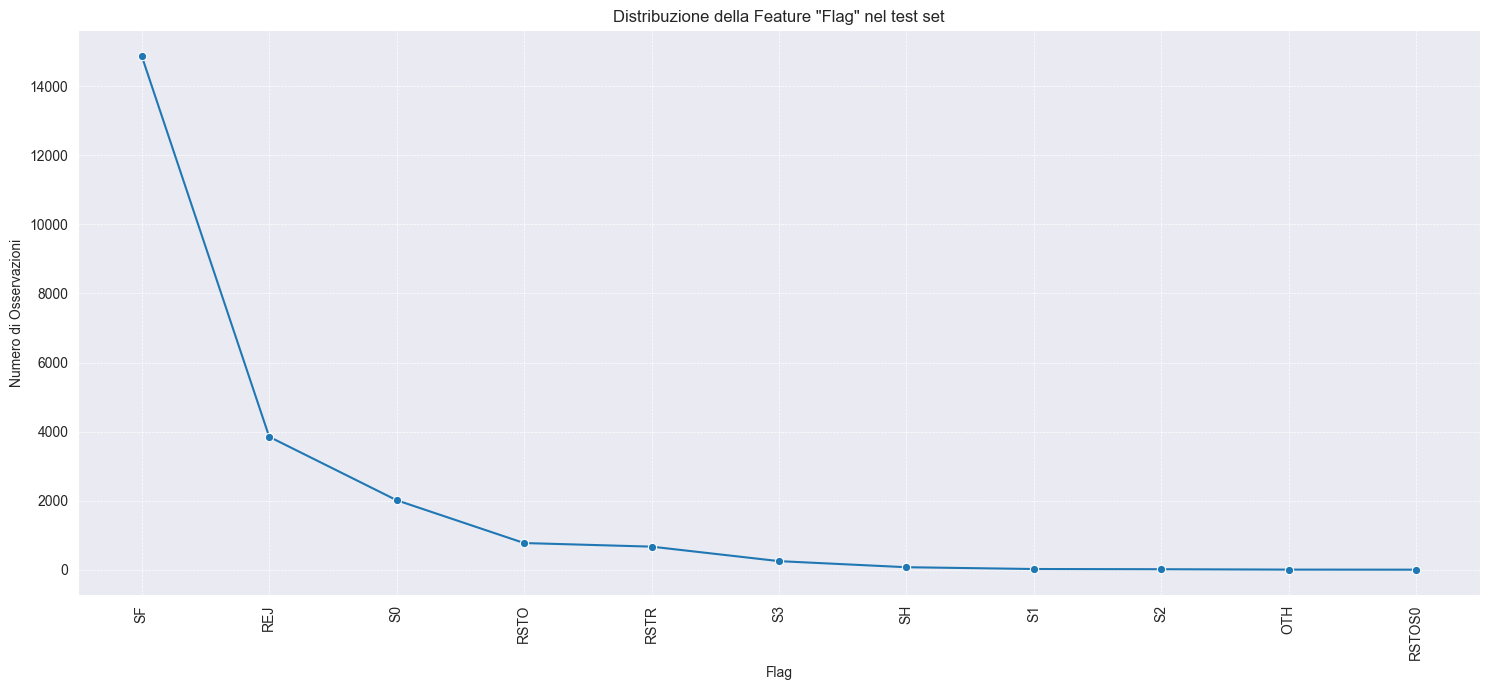

In [24]:
Utils.plot_line_distribution(
    df=df_test,
    column='flag',
    title='Distribuzione della Feature "Flag" nel test set',
    xlabel='Flag'
)

## FEATURE CONTINUE

In [25]:
# CONTROLLIAMO SE CI SONO FEATURE BINARIE TRA QUELLE CONTINUE
# Filtra le colonne con dati di tipo float e int
features_continue = df_train.select_dtypes(include=['float64', 'int64'])

# Controlla se le feature sono binarie
binary_features = []
non_binary_features = []

for column in features_continue.columns:
    unique_values = features_continue[column].nunique()
    if unique_values == 2:
        binary_features.append(column)
    else:
        non_binary_features.append(column)

print("Feature binarie:", binary_features)
print("Feature non binarie:", non_binary_features)

Feature binarie: ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']
Feature non binarie: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']


In [26]:
#NUMERO DI VALORI DISTINTI

# Calcola e stampa il numero di valori distinti per ogni feature continua
unique_counts = features_continue.nunique()
print(unique_counts)

duration                       2981
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                   101
diff_srv_rate                    95
srv_diff_host_rate          

In [27]:
# rimuove la feature num_outbound_cmds perchè composta da soli 0
df_train = df_train.drop(columns=['num_outbound_cmds'])
df_test = df_test.drop(columns=['num_outbound_cmds'])

### Distribuzione di un sottoinsieme

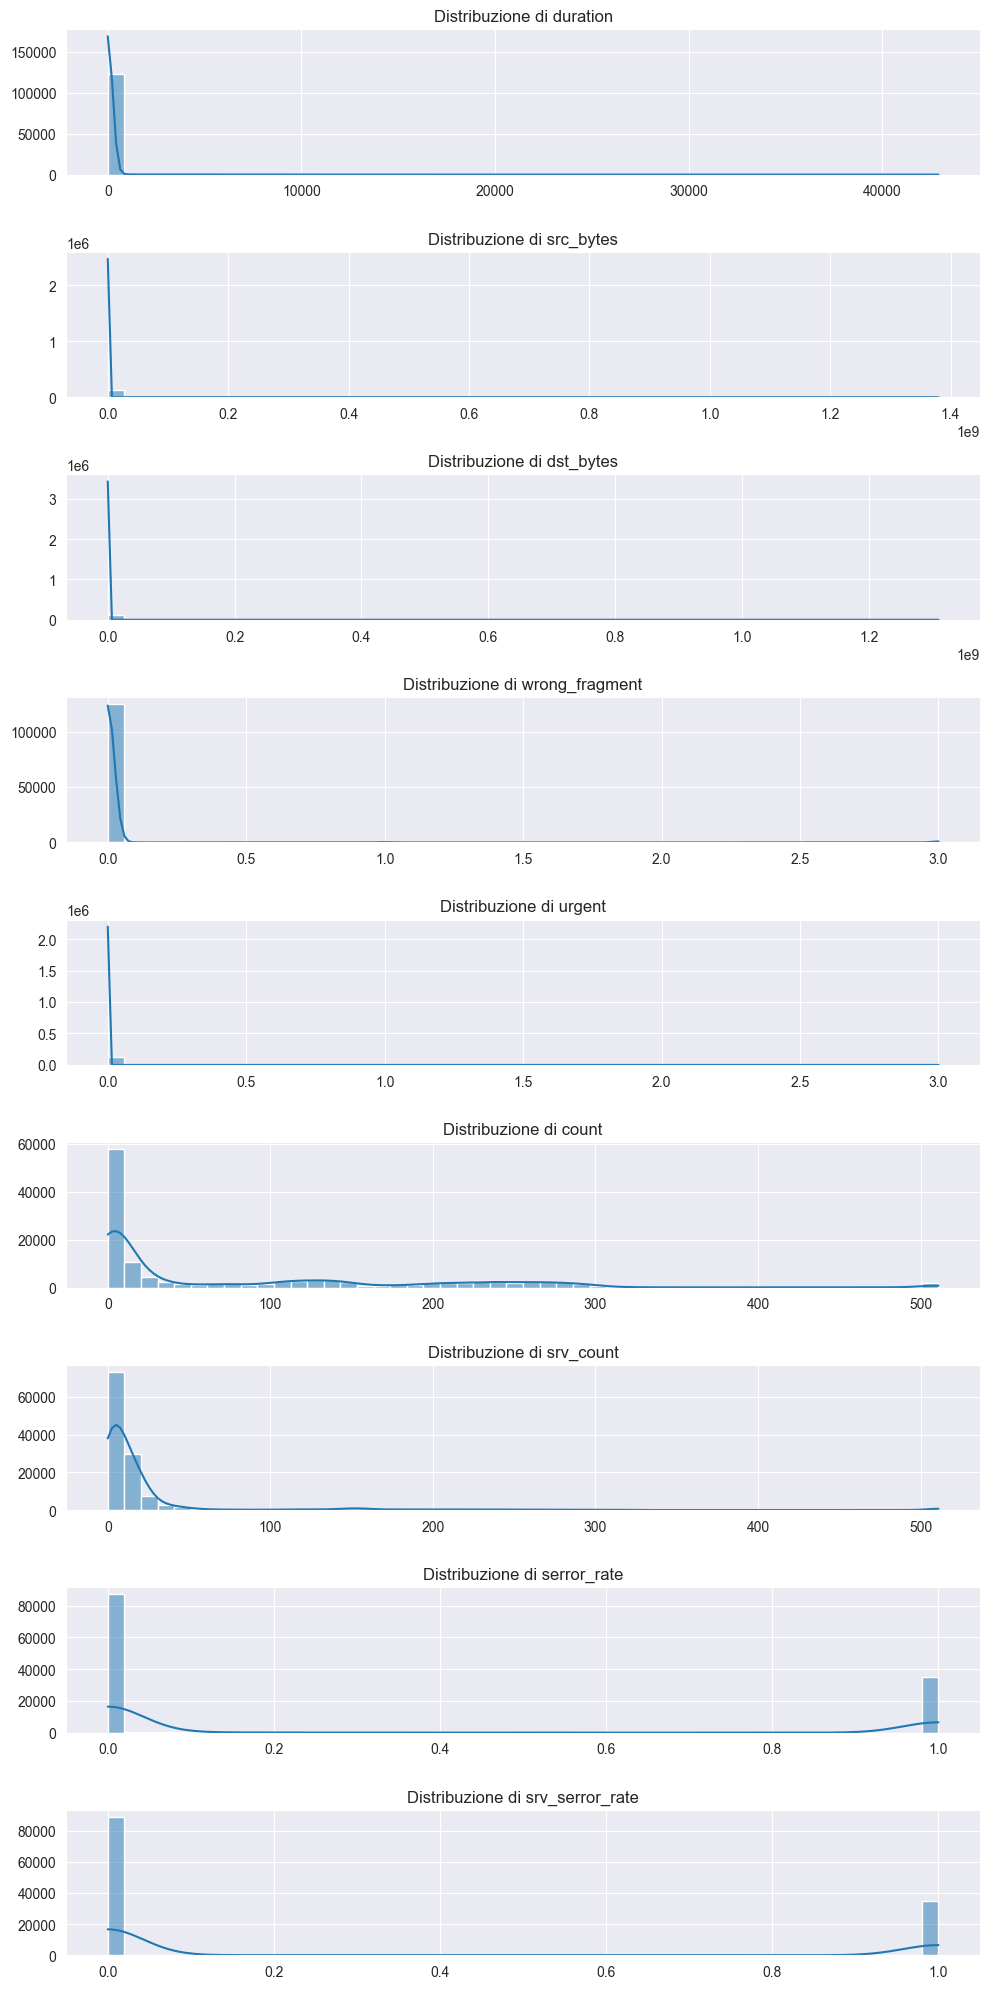

In [19]:
# Selezione di un sottoinsieme di feature continue
numerical_features_subset = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent',
                             'count', 'srv_count', 'serror_rate', 'srv_serror_rate']

# Plotting delle dsitribuzioni
fig, axes = plt.subplots(len(numerical_features_subset), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features_subset):
    sns.histplot(df_train[feature], bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuzione di {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


### Violin Plot

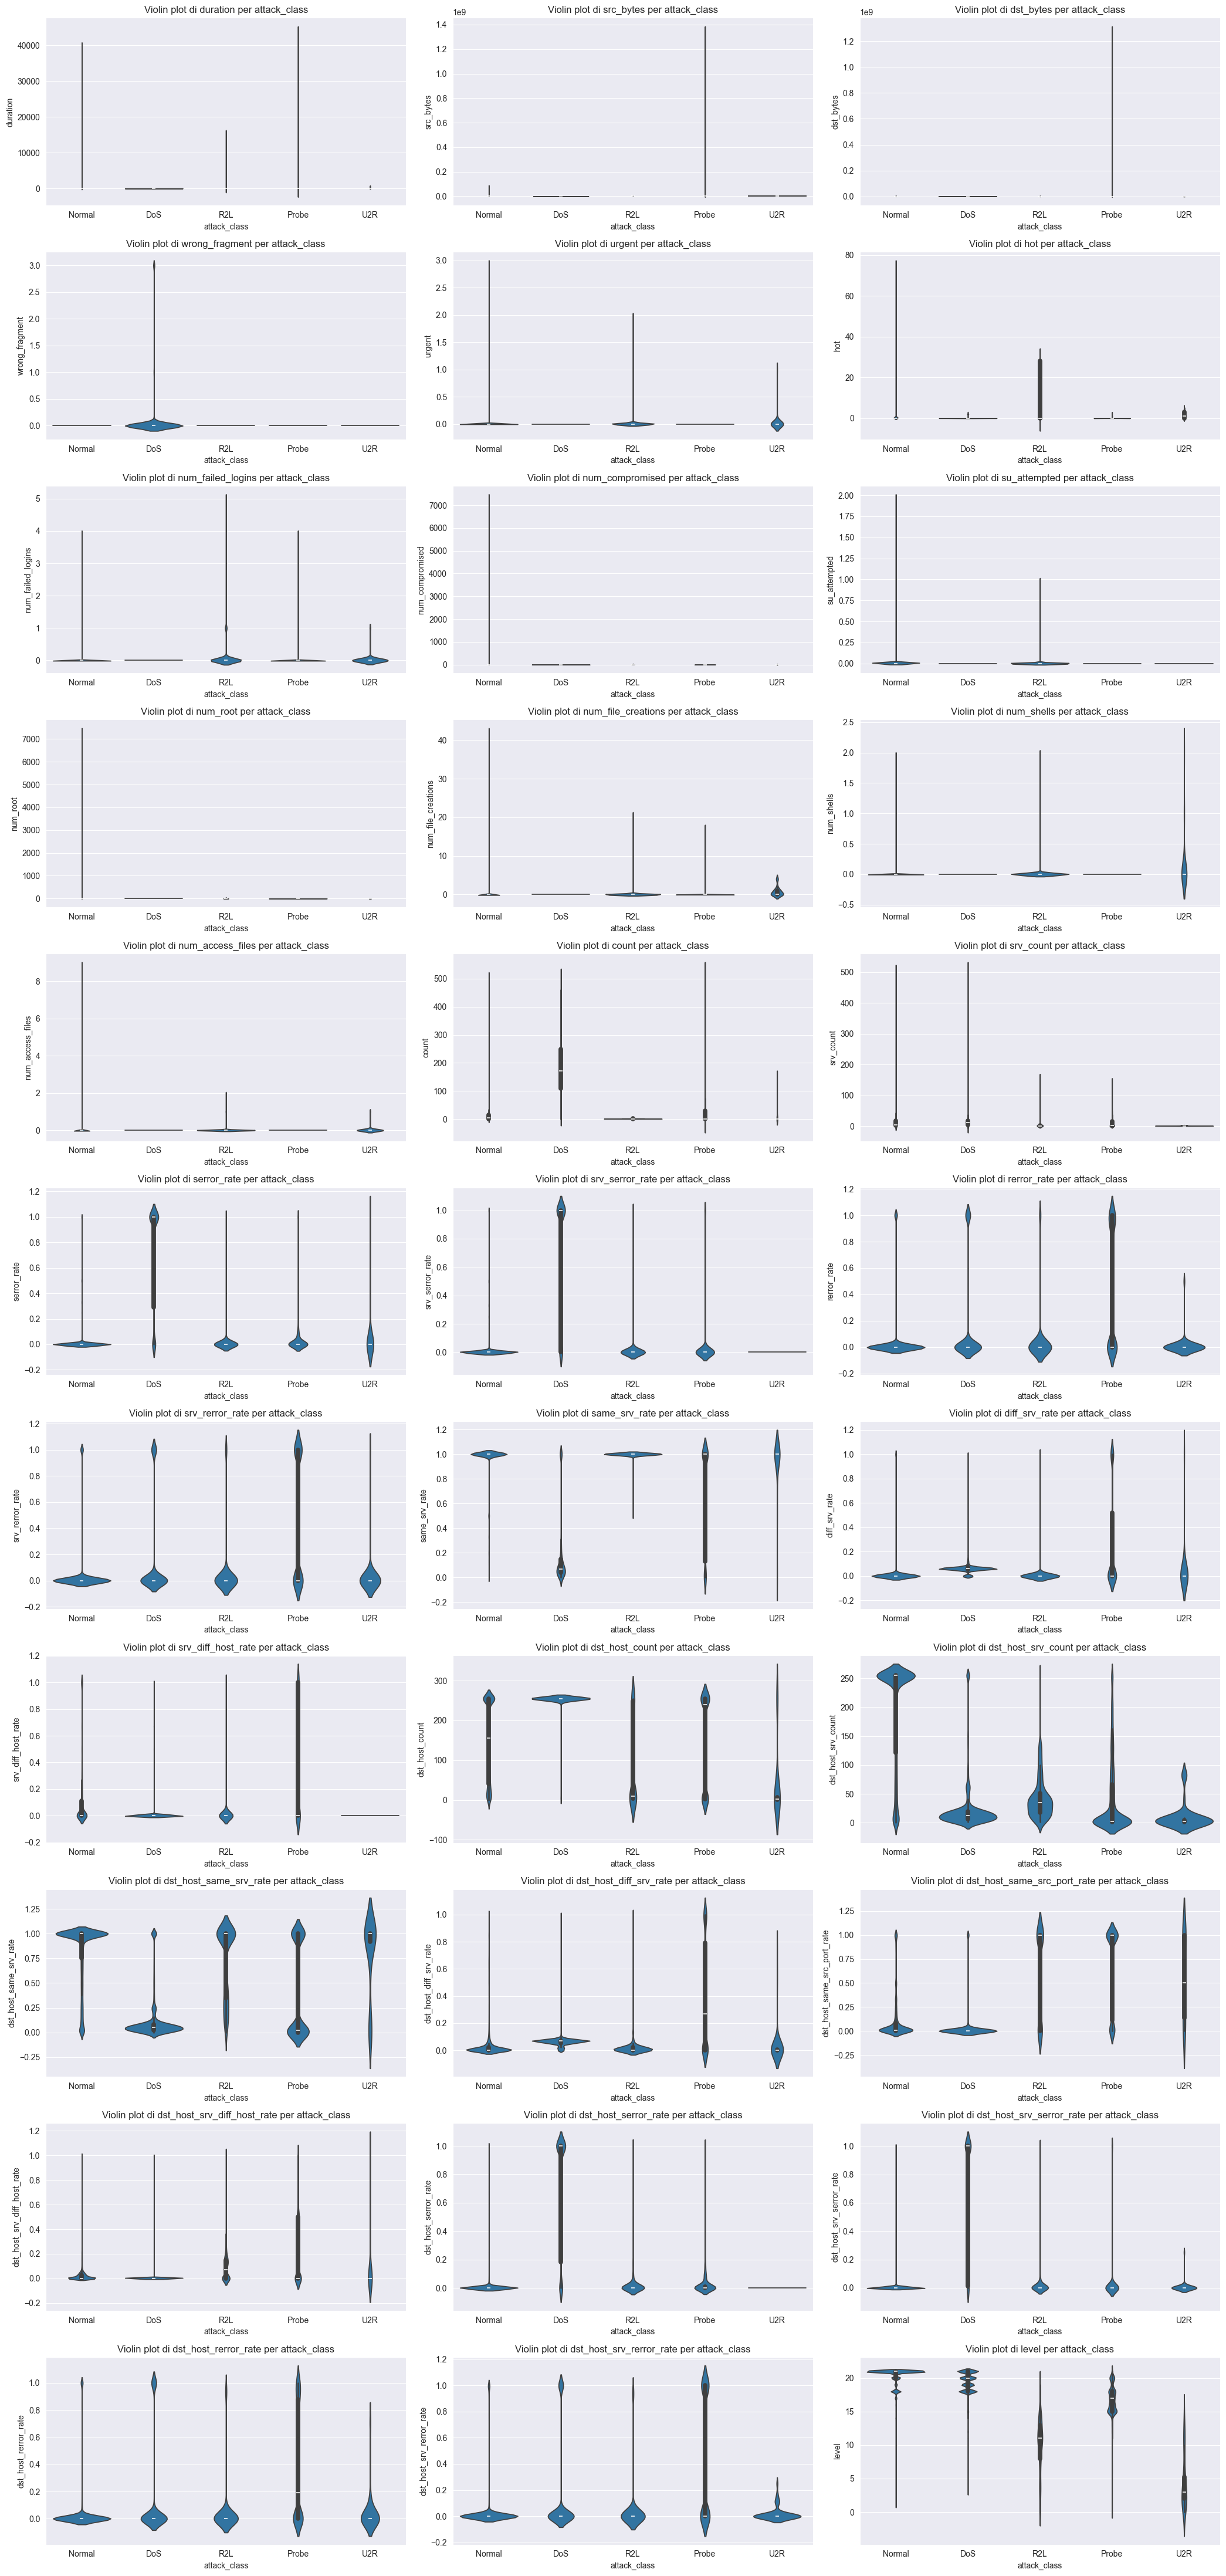

In [22]:
features_continue = df_train.select_dtypes(include=['float64', 'int64'])

# Filtrare le feature che non sono binarie
non_binary_features = [feature for feature in features_continue if len(df_train[feature].unique()) > 2]

# Determina il numero di righe necessarie per la griglia di subplot basandoti sulle feature
num_features = len(non_binary_features)
num_columns = 3
num_rows = num_features // num_columns + (num_features % num_columns > 0)

# Imposta la dimensione della figura in modo che ciascun subplot abbia una dimensione adeguata
plt.figure(figsize=(num_columns * 7, num_rows * 4))

# Creare i violin plot per ogni feature continua non binaria
for i, feature in enumerate(non_binary_features, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.violinplot(x='attack_class', y=feature, data=df_train)
    plt.title(f'Violin plot di {feature} per attack_class')

plt.tight_layout()
plt.show()

### Correlazione tra feature continue

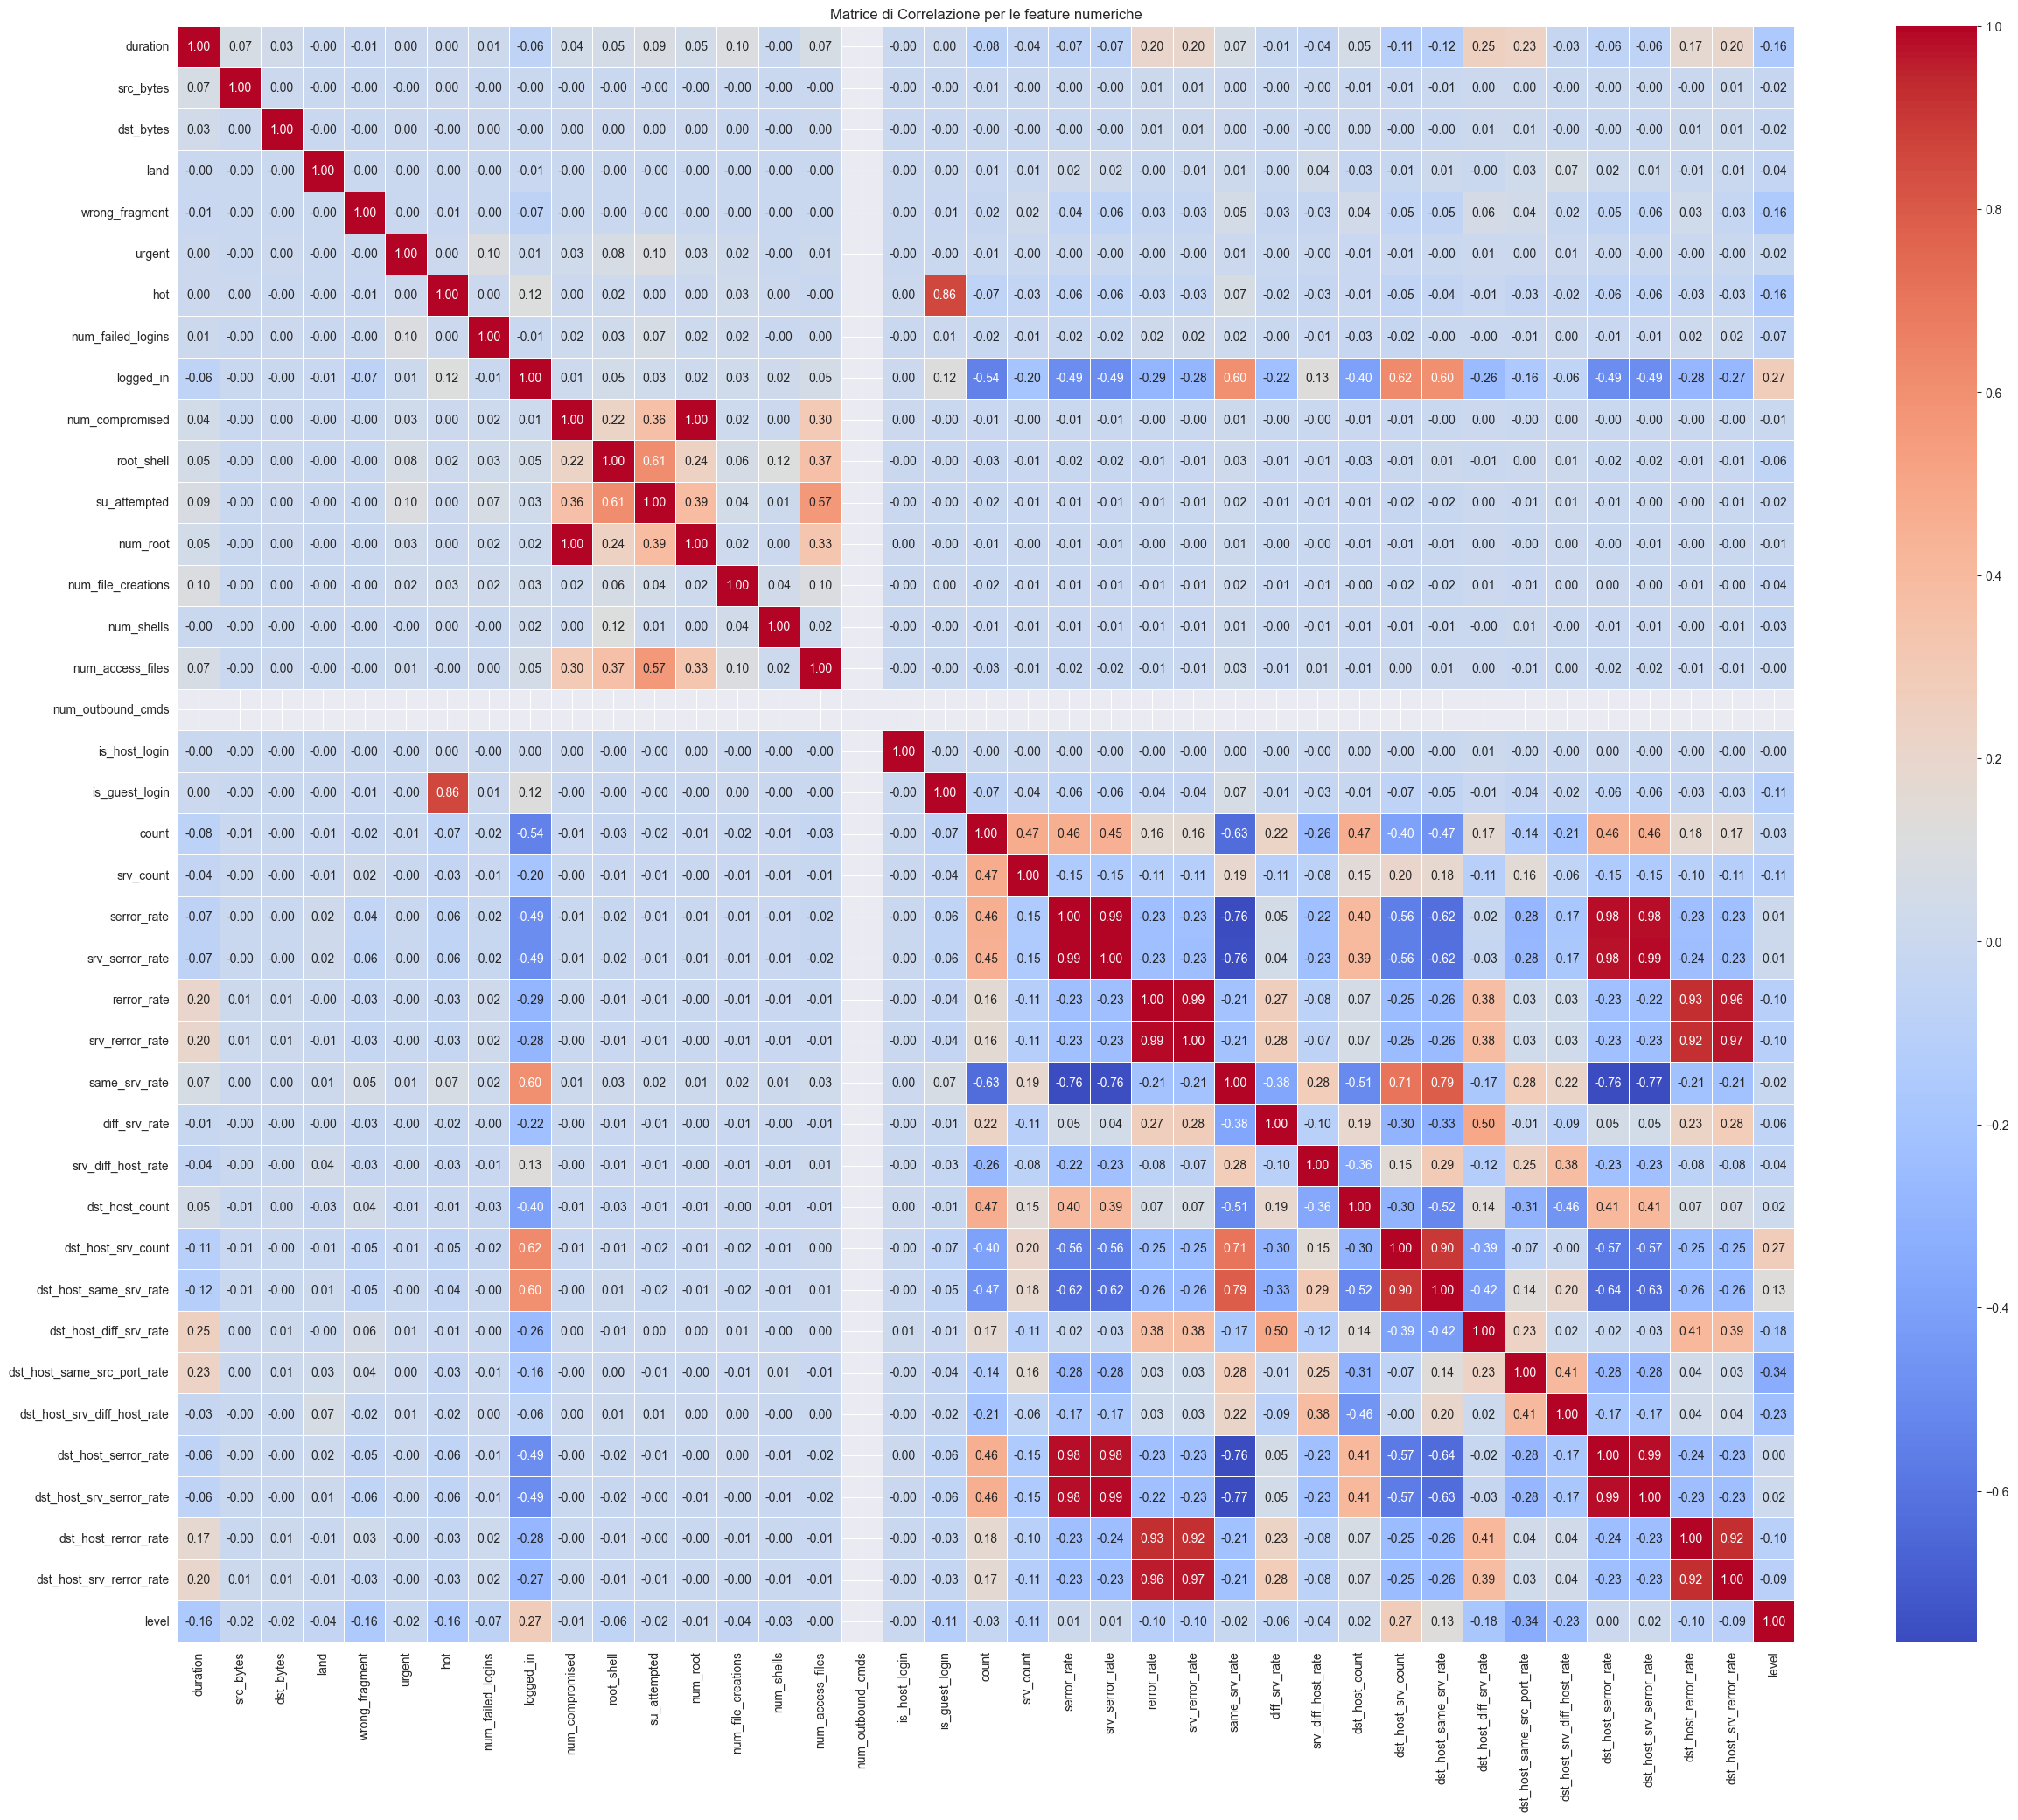

In [26]:
# CCalcola matrice di correlazione
correlation_matrix = df_train.corr(numeric_only=True)

# Matrice di correlazione come heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title('Matrice di Correlazione per le feature numeriche')
plt.show()



## Outliers

In [28]:
from scipy import stats
import numpy as np

# Calculating Z-scores of the data
z_scores = np.abs(stats.zscore(df_train))
threshold = 3  # Commonly used threshold for identifying outliers

# Identifying outliers
outliers = (z_scores > threshold).any(axis=1)
outlier_data = df_train[outliers]

# How many outliers do we have?
num_outliers = outlier_data.shape[0]
percentage_outliers = (num_outliers / df_train.shape[0]) * 100

num_outliers, percentage_outliers, outlier_data.head()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the data to two principal components for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the encoded attack categories for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['attack_category'] = y

# Plotting the first two principal components
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='attack_category', data=pca_df, palette='bright', alpha=0.7)
plt.title('2D PCA of NSL-KDD Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Re-import necessary libraries and load the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine the attack mapping
attack_mapping = {
    'normal': 'Normal',
    'back': 'Dos', 'land': 'Dos', 'neptune': 'Dos', 'pod': 'Dos', 'smurf': 'Dos', 'teardrop': 'Dos',
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L', 'spy': 'R2L',
    'warezclient': 'R2L', 'warezmaster': 'R2L'
}

# Load the dataset
file_path = '/mnt/data/KDDTrain+_20Percent.txt'

# Define column names based on the KDD Cup 1999 task description
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]

# Read the file with pandas
data = pd.read_csv(file_path, header=None, names=column_names)

# Apply the mapping to the 'label' column to create 'attack_category'
data['attack_category'] = data['label'].map(lambda x: attack_mapping.get(x, 'Unknown'))

# Encode the 'attack_category' column to transform categorical labels into integers
label_encoder = LabelEncoder()
data['attack_category_encoded'] = label_encoder.fit_transform(data['attack_category'])

# Prepare the features and target variable for PCA
X = pd.get_dummies(data.drop(['label', 'attack_category', 'attack_category_encoded', 'difficulty_level'], axis=1))
y = data['attack_category_encoded']

# Standardizing the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the data to two principal components for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the encoded attack categories for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Attack Category'] = y.map(lambda x: label_encoder.inverse_transform([x])[0])

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Attack Category', data=pca_df, palette='bright', alpha=0.7)
plt.title('2D PCA of NSL-KDD Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Apply PCA to reduce the data to three principal components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame with the PCA results for 3D plotting
pca_df_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Attack Category'] = y.map(lambda x: label_encoder.inverse_transform([x])[0])

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D PCA
sc = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'],
                c=label_encoder.transform(pca_df_3d['Attack Category']),
                cmap='viridis', alpha=0.7)

# Create a legend with attack category names
legend_labels = {v: k for k, v in label_encoder.transform(label_encoder.classes_).items()}
legend_with_handles = ax.legend(*sc.legend_elements(), title="Attack Category")
ax.add_artist(legend_with_handles)

# Set labels for axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set title
ax.set_title('3D PCA of NSL-KDD Dataset')

plt.show()